[Github Repo]()

### Set working directory

In [3]:
import os 
os.chdir('C:/Users/System Administrator/Desktop/ML/Assignment_1')

### Import libraries

In [4]:
import numpy as np
import pandas as pd
import idx2numpy
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Read all idx files

In [5]:
# tr: Training set, te: Test set, x: Dependent variable(s) (Predictor), y: Independent variable (Target)
tr_x = idx2numpy.convert_from_file('./data/train-images.idx3-ubyte')
tr_y = idx2numpy.convert_from_file('./data/train-labels.idx1-ubyte')
te_x = idx2numpy.convert_from_file('./data/t10k-images.idx3-ubyte')
te_y = idx2numpy.convert_from_file('./data/t10k-labels.idx1-ubyte')

### About data

In [7]:
print(f"Size of the training dataset, {tr_x.shape}")
print(f"Size of the testing dataset, {tr_y.shape}")
print(f"Size of the training dataset, {te_x.shape}")
print(f"Size of the training dataset, {te_y.shape}")

Size of the training dataset, (60000, 28, 28)
Size of the training dataset, (60000,)
Size of the training dataset, (10000, 28, 28)
Size of the training dataset, (10000,)


In [8]:
int(5.6)

5

### Lets plot some of the digit from traning set

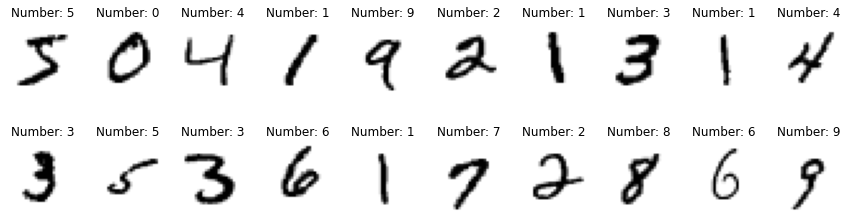

In [5]:
# Creating 20 subplot layout
fig, axes = plt.subplots(2,10, figsize = (15,4))
for ax, img, num in zip(axes.ravel(), tr_x[0:20], tr_y[0:20]):
    ax.axis('off')
    ax.imshow(img, cmap = plt.cm.gray_r)
    ax.set_title('Number: ' + str(num))

### Flatten the data

In [6]:
tr_x = np.array([i.flatten() for i in tr_x])
te_x = np.array([i.flatten() for i in te_x])

### Making Data Frame

#### Training and Testing Data

In [7]:
train_x = pd.DataFrame(tr_x, columns = ['pixel'+str(i) for i in range(1, 28*28+1)])
train_y = pd.DataFrame(tr_y, columns = ['label'])
test_x = pd.DataFrame(te_x, columns = ['pixel'+str(i) for i in range(1, 28*28+1)])
test_y = pd.DataFrame(te_y, columns = ['label'])

In [8]:
train_x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_y

,label
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [10]:
test_x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_y

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


#### Separate 20% of data for cross validation

In [12]:
idx = np.random.choice(60000, size = 12000, replace = False)
cvalid_x = train_x.iloc[idx]
train_x = train_x.drop(idx)
cvalid_y = train_y.iloc[idx]
train_y = train_y.drop(idx)

In [13]:
print(f"Shape of training set:         {train_x.shape} ")
print(f"Shape of training lebel set:   {train_y.shape} ")
print(f"Shape of testing set:          {test_x.shape}  ")
print(f"Shape of testing lebel set:    {test_y.shape}  ")
print(f"Shape of validation set:       {cvalid_x.shape}")
print(f"Shape of validation lebel set: {cvalid_y.shape}")

Shape of training set: (48000, 784)
Shape of training lebel set: (48000, 1)
Shape of testing set: (10000, 784)
Shape of testing lebel set: (10000, 1)
Shape of validation set: (12000, 784)
Shape of validation lebel set: (12000, 1)


#### Validation Set

In [14]:
train_x = pd.DataFrame(tr_x)
train_y = pd.DataFrame(tr_y)
idx = np.random.choice(60000, size = 12000, replace = False)
cvalid_x = train_x.iloc[idx]
train_x = train_x.drop(idx)
cvalid_y = train_y.iloc[idx]
train_y = train_y.drop(idx)

In [25]:
train_y.columns = ['label']
train_y

,label
0,5
1,0
5,2
6,1
7,3
...,...
59993,5
59994,1
59995,8
59998,6


### Define KNN predictor 

In [105]:
def accuracy(y_pred,y_label):
    accuracy = (np.array(np.array(y_pred)==np.array(y_label)).sum()/len(y_pred))*100
    return accuracy

In [17]:
def knn(k,distance):
    y_hat = []
    for i in range(len(distance.columns)):
        dummy_df = pd.concat([distance[i], train_y], axis = 1)
        sorted_dummy_df = dummy_df.sort_values(i, axis = 0)
        final_df = sorted_dummy_df.iloc[:k,:]
        frequency = final_df.value_counts(sorted_dummy_df.label)
        most_frequent = np.argmax(frequency)
        y_hat.append(frequency.index[most_frequent])
    return y_hat

### Euclidean

In [41]:
euc_d = pd.DataFrame(metrics.pairwise_distances(train_x,cvalid_x, "euclidean"), index = train_y.index)

In [42]:
euc_d

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,2350.695216,2373.431061,2733.597264,2448.943037,2397.046307,2437.297274,2469.136489,2710.923459,2868.021792,2772.078462,...,2761.604787,2088.511432,2378.075482,2362.411268,2574.623856,2160.547616,2655.503530,2574.584238,2359.424718,2360.593993
1,2758.949800,2772.106239,2761.374296,2604.985221,2661.199166,2631.604834,2662.412628,1588.749194,2836.713768,2636.094270,...,2789.598358,2423.727295,2568.107280,2235.136909,2411.458065,2375.235567,2884.851989,2895.805933,2638.779832,2780.038129
5,2564.641885,2524.020800,2709.458618,2473.882374,2466.450689,2566.862676,2574.890095,2688.034226,2665.971305,2648.516000,...,2320.088576,2486.860269,2468.626946,2364.602504,2108.203501,2295.126576,2626.573243,2837.382949,2485.660677,2527.569979
6,1275.146658,2316.394181,2758.546900,2247.987322,1517.573062,2284.592086,1911.413613,3301.541913,2750.744990,2716.299689,...,2083.966890,2270.793474,1844.005965,2576.100153,2806.213285,2357.761014,2354.880464,2548.164241,2003.215914,1074.303961
7,2662.997559,2221.353866,2746.600444,2809.218397,2804.333967,2423.262264,2792.568173,2613.307483,2514.027247,2767.985730,...,2827.922382,2342.436339,2761.855355,2446.708605,2433.603501,2576.208066,2457.671866,2613.209138,2703.820815,2786.297543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59993,2134.320032,2196.418221,2649.474287,2010.454178,2194.963098,2151.292635,2187.423827,2797.936740,2701.510503,2553.326262,...,1937.275148,2154.217723,1729.045691,2003.192702,2590.692957,1541.674414,2563.496635,2454.629504,1930.832204,2077.582249
59994,2140.234567,2035.367043,2811.485017,2224.323717,2119.932782,1867.361240,2157.016226,3177.802700,2602.872068,2564.527442,...,1644.879631,2203.743179,1482.954146,2297.922322,2825.099644,2035.992633,2628.942563,2417.640585,1652.882633,1935.910638
59995,2327.391458,2138.706618,2770.657142,2410.975529,2334.649010,2297.906656,2368.987125,2989.064904,2669.807484,2840.623875,...,2342.507204,2279.124613,2340.068802,2477.752207,2568.674561,2388.167289,2618.120700,2403.645357,2385.133539,2226.050089
59998,2278.186779,2595.280717,2842.386145,2141.346539,2347.812599,2389.223933,2186.489424,2500.590530,2788.616861,2659.875937,...,2379.381852,2404.565449,2084.617951,1905.360333,2340.600137,2112.886414,2820.574764,2755.098365,2257.701929,2270.734022


In [ ]:
euc_pred = [knn(k, euc_d) for k in range(1,26,2)]
euc_pred_df = pd.DataFrame(euc_pred)

In [117]:
euc_pred_df

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,1,8,7,6,1,2,6,0,2,0,...,5,5,1,0,0,5,8,3,1,1
1,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,2,5,8,3,1,1
2,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1
3,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1
4,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1
5,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1
6,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1
7,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1
8,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1
9,1,8,7,6,1,2,6,0,2,2,...,5,5,1,0,0,5,8,3,1,1


In [137]:
accuracies = [accuracy(cvalid_y[0], euc_pred_df.iloc[i]) for i in range(13)]

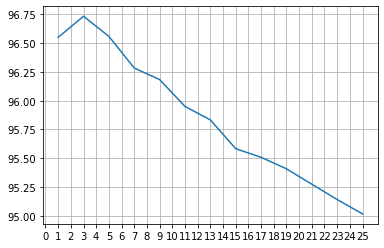

In [148]:
plt.plot(range(1,26,2),accuracies)
x =  np.arange(0,26,1)
plt.xticks(x,)
plt.grid()

In [149]:
m = np.argmax(np.array(accuracies))
pd.DataFrame(confusion_matrix(cvalid_y, euc_pred_df.iloc[m,:]))

,0,1,2,3,4,5,6,7,8,9
0,1163,1,1,0,0,0,3,1,0,0
1,0,1332,0,0,1,0,0,1,0,1
2,7,11,1181,1,2,1,1,12,3,2
3,4,0,6,1139,0,17,0,10,3,3
4,1,11,0,0,1099,0,0,0,0,21
5,4,1,0,10,1,1036,15,0,1,3
6,6,4,0,0,1,4,1197,0,0,0
7,0,4,2,0,2,0,0,1285,0,5
8,2,18,6,11,9,12,4,2,1126,8
9,4,2,1,5,10,3,0,11,3,1143


In [150]:
print("Required value of k is ", np.arange(1,26,2)[m])

Required value of k is  3


### Manhattan

In [127]:
man_d = pd.DataFrame(metrics.pairwise_distances(train_x,cvalid_x, 'manhattan'), index = train_y.index)

In [128]:
man_pred = [knn(k, man_d) for k in range(1,26,2)]
man_pred_df = pd.DataFrame(man_pred)

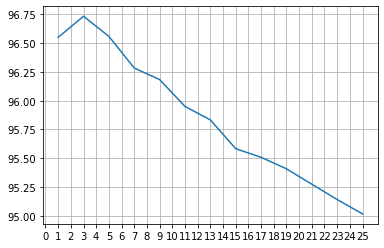

In [145]:
accuracies = [accuracy(cvalid_y[0], man_pred_df.iloc[i]) for i in range(13)]
plt.plot(range(1,26,2),accuracies)
x =  np.arange(0,26,1)
plt.xticks(x,)
plt.grid()

In [146]:
m = np.argmax(np.array(accuracies))
pd.DataFrame(confusion_matrix(cvalid_y, man_pred_df.iloc[m,:]))

,0,1,2,3,4,5,6,7,8,9
0,1160,1,1,0,0,0,3,2,0,2
1,0,1331,0,0,2,0,0,1,0,1
2,7,21,1167,1,1,1,0,18,3,2
3,4,3,7,1137,0,17,0,9,3,2
4,1,14,0,0,1084,0,2,1,0,30
5,4,2,0,10,2,1035,13,1,1,3
6,6,5,1,0,2,5,1193,0,0,0
7,0,3,2,0,2,0,0,1285,0,6
8,3,26,7,25,11,18,4,4,1090,10
9,8,5,0,6,14,3,0,18,2,1126


In [147]:
print("Required value of k is ", np.arange(1,26,2)[m])

Required value of k is  3


### Chebyshev

In [132]:
che_d = pd.DataFrame(metrics.pairwise_distances(train_x,cvalid_x, 'chebyshev'), index = train_y.index)

In [133]:
che_pred = [knn(k, che_d) for k in range(1,26,2)]
che_pred_df = pd.DataFrame(che_pred)

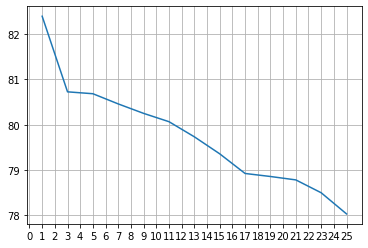

In [140]:
accuracies = [accuracy(cvalid_y[0], che_pred_df.iloc[i]) for i in range(13)]
plt.plot(range(1,26,2),accuracies)
x =  np.arange(0,26,1)
plt.xticks(x,)
plt.grid()

In [141]:
m = np.argmax(np.array(accuracies))
pd.DataFrame(confusion_matrix(cvalid_y, che_pred_df.iloc[m,:]))

,0,1,2,3,4,5,6,7,8,9
0,1091,3,12,11,5,12,18,1,13,3
1,0,1304,4,6,0,3,5,3,7,3
2,57,24,830,79,21,39,46,25,78,22
3,34,13,53,880,4,52,18,22,90,16
4,21,7,19,11,885,34,24,16,49,66
5,45,12,22,78,11,724,23,16,108,32
6,30,5,12,5,11,14,1112,1,17,5
7,7,9,11,12,22,17,8,1130,37,45
8,15,34,23,87,13,64,20,10,904,28
9,14,4,6,20,25,18,6,17,45,1027


In [143]:
print("Required value of k is ", np.arange(1,26,2)[m])

Required value of k is  1


### Testing

#### (code is look like below, but for memory error it is not included in this file)

In [ ]:
euc_d_test = pd.DataFrame(metrics.pairwise_distances(train_x,test_x, "euclidean"), index = train_y.index)
euc_pred_test = [knn(k, euc_d_test) for k in range(1,26,2)]
euc_pred_df_test = pd.DataFrame(euc_pred_test)
accuracies_test = [accuracy(test_y[0], euc_pred_df_test.iloc[i]) for i in range(13)]
m1 = np.argmax(np.array(accuracies))
print("The accuracy for Euclidean distance on test set is", accuracies_test[m1]*100)